# Data Science Salary Analysis Report


Youjin An: an.yo@northeastern.edu

Yidi Wang: wang.yidi1@northeastern.edu 

Yutong Lu: lu.yuton@northeastern.edu


# Problem Statement and Background



We are focusing on factors, including job titles, locations, and industry, that would possibly affect the salary of data-related jobs and factors such as company's rating employees might consider when applying for a job. 
This dataset was made by collecting the job postings related to the position of 'Data Scientist' from www.glassdoor.com in the USA. The dataset contains wide aspects that we can look into, including simplified job titles, rating of the company, size of the company, the year the company was founded, the industry, age of employees, 17 types of data-related skills, revenue, and so on. Although the dataset is said to be cleaned, it still contains na and abnormal values in some specific columns. 


# Introduction and Description of the Data

With the progress of the present age and the development of science and technology,  artificial intelligence and data automation will replace many traditional jobs, so coding learning or data analysis has become a necessary skill for everyone.
More and more people are leaving these traditional jobs to enter the new data-related industry, including students in this course, who are planning to work in data-related jobs.
There is a wide range of data-related jobs, and different industries have different subdivisions, so having a general understanding of them before entering the workforce will help students know what titles they are interested so that they can take fewer detours. Questions about salary are not only important to job seekers but also have a great impact on companies, as companies need to know the salary level in their industry so they can pay their employees the appropriate salary. For this project, our group will use the dataset called Data scientist salary from https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor. 







# Methods

* In terms of data cleansing, we use the heatmap to check the appearance of missing values and pandas.Datarframe.value_counts() function to check if the columns contain na or abnormal values or not.
* In terms of the relationship between average salary and the states, we develop the bar plot, choropleth map reflective of salary level, and function that returns the average salary based on job title and locations. 
* In terms of the relationship between average salary and job titles, we develop the bar plot, calculate the probability of different types of skills owned for jobs with top 4 highest salary, and linear regression model that predicts the average salary based on job title and locations. 

* In terms of the relationship between average salary and industry, we develop the bar plot. 

* In terms of the relationship between company's rating, size, and age of the company, we develop the correlation matrix and scatter plots. 

# Results


# Step 1: Import useful packages and do the data cleaning

In [123]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
import plotly.express as px
import plotly

<AxesSubplot:>

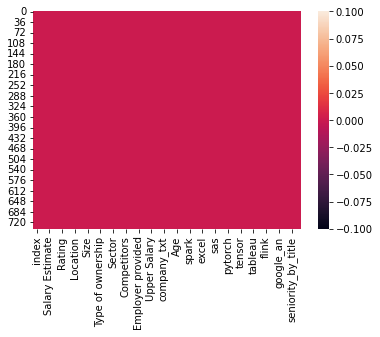

In [124]:
# read the data and do the cleaning 
df = pd.read_csv('data_cleaned_2021.csv')
df = df.dropna()
df.isnull()

# show the missing value in the heatmap: no missing values 
sns.heatmap(df.isnull())

In [125]:
# drop the irrelevant columns
df=df.drop(columns = ['Job Description', 'index', 'Company Name', 'Location',
                      'Headquarters', 'Age', 'Type of ownership', 'Sector','Competitors',
                      'Hourly', 'Employer provided', 'company_txt'])

In [126]:
# print out all columns for future use 
df.columns 

Index(['Job Title', 'Salary Estimate', 'Rating', 'Size', 'Founded', 'Industry',
       'Revenue', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'Job Location', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority_by_title',
       'Degree'],
      dtype='object')

# Step 2: Testing 4 Hypothesises

## Hypothesis 1: There is a big difference in the average salary of data science in different states.

### Average Salary Function based on location and job title

In [127]:
def cal_salary(dataframe, job_title, location):
    """
    Function: cal_salary
    Parameter: dataframe, user input of job_title and locations, string
    Return: corresponding average salary, a number
    """

    # if location and job_title all in columns, group them into 
    locations = dataframe['Job Location'] == location 
    job_titles = dataframe['job_title_sim'] == job_title
        
    # extract the specific location's and job title's corresponding rows to the new dataframe
    df_salary_prediction = dataframe[locations & job_titles]
    return df_salary_prediction['Avg Salary(K)'].mean()

In [128]:
# List all simplified job titles 
df = df.drop(df[df['job_title_sim'] == 'na'].index)
df['job_title_sim'].value_counts()


data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [129]:
# List all states 
df['Job Location'].value_counts()

CA    150
MA    101
NY     72
VA     41
IL     40
PA     33
MD     32
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
AL      7
MO      7
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job Location, dtype: int64

In [132]:
# get the inputs about location and job title from users 
# call the function to predict the average salary 
job_user_input = input("Enter job title you are looking for:\n")
location_user_input = input("Enter state abbreviation you are looking for:\n")
user_input = cal_salary(df,job_user_input,location_user_input)
print(user_input)
cal_salary(df,'data scientist','NM')

Enter job title you are looking for:
data scientist
Enter state abbreviation you are looking for:
MA
106.5


74.33333333333333

### Choropleth map reflective of 'Avg Salary(K)' 

In [133]:
job_user_input = input("Enter job title you are looking for:\n")

# collect the data about the salary 
avg_salary = []
for i in df['Job Location'].values:
    # call the average salary function and add the values to list
    avg_salary.append(cal_salary(df,job_user_input,i))
print(avg_salary)

Enter job title you are looking for:
data scientist
[74.33333333333333, 109.11538461538461, 97.35714285714286, 99.76470588235294, 115.25, 100.73076923076923, 109.11538461538461, 141.0472972972973, 115.25, 115.25, 141.0472972972973, 102.08695652173913, 100.73076923076923, 99.76470588235294, 106.5, 125.08333333333333, 106.5, 141.0472972972973, 141.0472972972973, 108.66666666666667, 99.76470588235294, 100.73076923076923, 147.0952380952381, 84.0, 102.08695652173913, 106.5, 98.5, 106.5, 84.0, 97.35714285714286, 99.76470588235294, 106.625, 106.5, 141.0472972972973, 106.5, 141.0472972972973, 141.0472972972973, 106.5, 141.0472972972973, 115.25, 141.0472972972973, 106.5, 141.0472972972973, 125.08333333333333, 147.0952380952381, 149.0, 99.76470588235294, 108.66666666666667, 105.28571428571429, 147.0952380952381, 97.35714285714286, 106.5, 68.0, 115.25, 141.0472972972973, 74.33333333333333, 141.0472972972973, 127.66666666666667, 109.11538461538461, 100.73076923076923, 105.28571428571429, 115.25, 1

In [134]:
# draw the choropleth map
import plotly.express as px
fig = px.choropleth(locations = df['Job Location'].values, locationmode = "USA-states",color = avg_salary , 
                    scope = "usa")
fig.add_scattergeo(
    locations = df['Job Location'],    
    locationmode = 'USA-states',
    text = df['Job Location'],
    mode = 'text')

fig.show()


Analysis:

We will take data scientist as input to observe its salary distribution. States with higher average salaries are marked in lighter colors, while states with lower salaries are marked in darker colors. The light blue means that the dataset does not include the salary data of the data scientist in that state. 
According to the map, Illinois pays the highest salary. Data scientists in California and Utah also receive better pay than in other states. New Mexico and Alabama pay much less salaries than other states. Other than these five states, the average salary in other states does not vary greatly, ranging from roughly 90k to 110k.


### Horizontal Bar Plot: Average Salary for Each State

In [135]:
# calculate the mean average for each state and sort 
avg_salary_state = df.groupby('Job Location').mean()[['Avg Salary(K)']]
avg_salary_state_sorted = avg_salary_state.sort_values('Avg Salary(K)', ascending = False)
print(avg_salary_state_sorted)

              Avg Salary(K)
Job Location               
CA               123.920000
IL               116.662500
DC               110.181818
MA               107.059406
NJ               104.558824
MI               100.250000
RI               100.000000
NY                98.652778
NC                98.452381
MD                97.718750
KY                97.000000
VA                95.621951
UT                94.150000
PA                93.863636
WA                93.190476
TX                92.678571
OR                92.125000
IN                90.300000
TN                89.269231
MO                88.785714
OH                87.571429
KS                87.000000
CO                86.181818
AZ                85.666667
MN                85.500000
GA                80.666667
IA                78.900000
FL                77.625000
NM                74.333333
WI                73.300000
CT                71.100000
SC                60.500000
AL                59.357143
LA                57

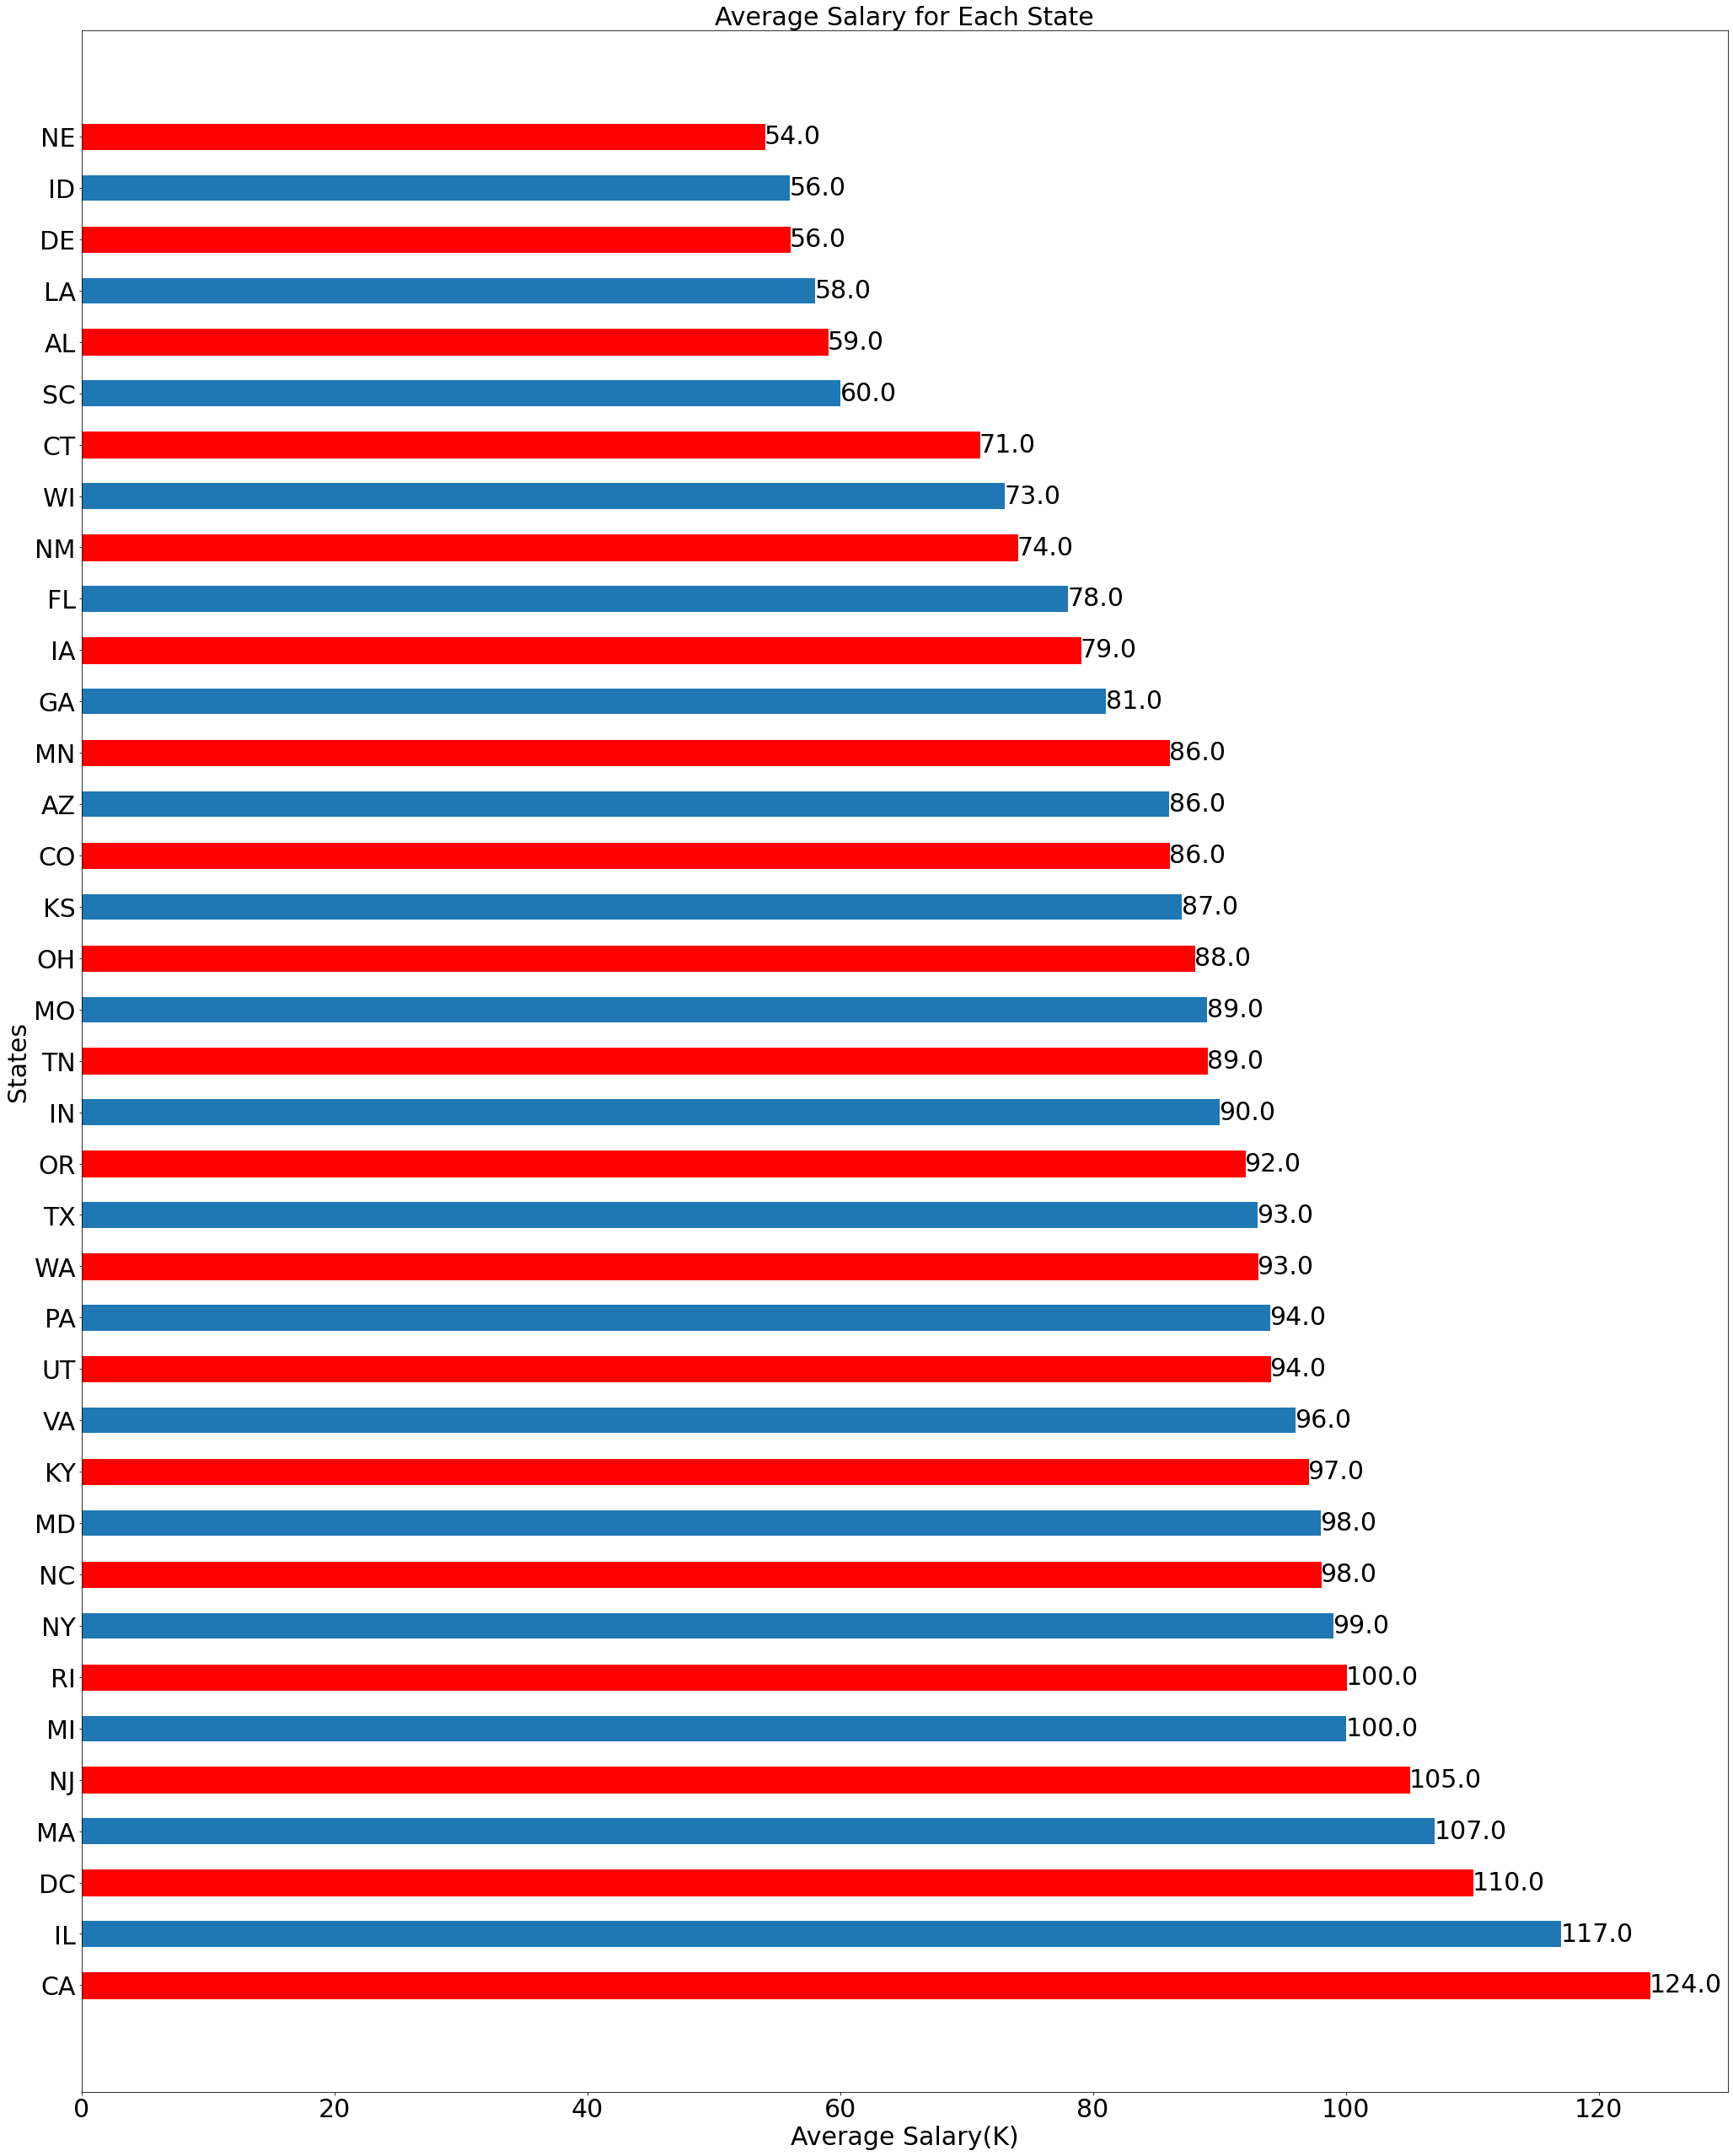

In [136]:
# define x and y axis 
x_2 = avg_salary_state_sorted.index
y_2 = avg_salary_state_sorted['Avg Salary(K)'].round()

# add the colors and numerical lables for each bar
fig, ax = plt.subplots(figsize=(35, 45))
bars = ax.barh(x_2, y_2, 0.5)
for bar in bars:
  width = bar.get_width() 
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center', fontsize = 30)
for bar in bars[::2]:
  bar.set_color('r')

# draw the plot
plt.title('Average Salary for Each State', fontsize = 30)
plt.xlabel('Average Salary(K)', fontsize = 30)
plt.ylabel('States',fontsize = 30)
plt.yticks(fontsize = 30)
plt.xticks(fontsize = 30)
plt.show()

Analysis:

The graph does not take job titles into consideration, instead only considers the job locations. 
These states can be divided into three groups based on their salary levels. States between Nebraska and South Carolina pay relatively less. States between Connecticut and Michigan pay moderate salaries, while states between New Jersey and California have the most generous pay packages. It is clear that most states are in the middle of the pay scale, except for the lowest and highest paying states, so there is little difference in pay between states.


## Hypothesis 2: Director, Machine Learning Engineer, Data Scientist Project Manager are top 3 jobs with the highest average salary.

In [137]:
# calcualte the average salary for each simplified job title 

average_salary_dict = {}
for i in df['job_title_sim'].value_counts().index:
    # create new data-frame for the all simplied titles and their corresponding row
    df_sim_title = df[df['job_title_sim'] == i]     
    sum_value = df_sim_title['Avg Salary(K)'].sum()   
    average_salary_dict[i] = sum_value/len(df_sim_title)

print(average_salary_dict)

{'data scientist': 118.29392971246007, 'other scientist': 88.05594405594405, 'data engineer': 105.40336134453781, 'analyst': 66.11386138613861, 'machine learning engineer': 126.43181818181819, 'Data scientist project manager': 73.21875, 'data analitics': 69.25, 'data modeler': 77.5, 'director': 130.8}


In [138]:
# sort the dictionary 
sorted_dict = sorted(average_salary_dict.items(),key=lambda x:x[1],reverse=True)

### Bar Plot: 4 Job Titles with Highest Average Salary

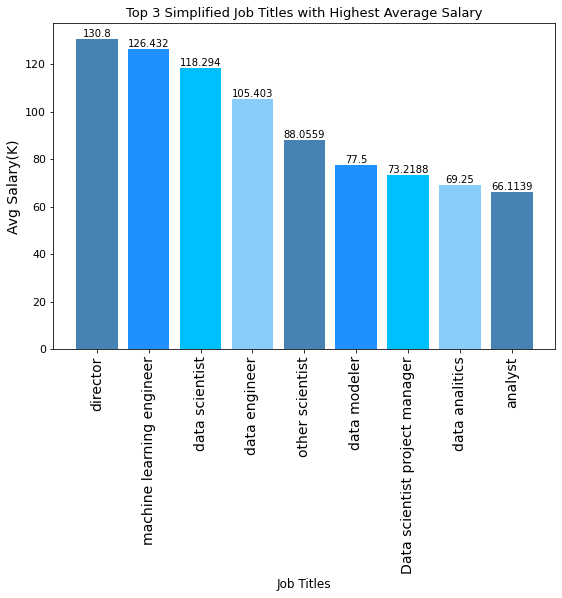

In [156]:
# draw the bar plot
x_1 = [i[0] for i in sorted_dict]
y_1 = [i[1] for i in sorted_dict]
plt.figure(figsize=(9,6)) 
p1 = plt.bar(x_1, y_1, color=('steelblue', 'dodgerblue', 'deepskyblue', 'lightskyblue'), label='value')
plt.bar_label(p1, label_type = 'edge')
plt.title('Top 3 Simplified Job Titles with Highest Average Salary', fontsize=13)
plt.ylabel('Avg Salary(K)',fontsize = 14)
plt.xlabel('Job Titles',fontsize = 12)
plt.xticks(fontsize=14, rotation = 90)
plt.yticks(fontsize=11)
plt.show()


Analysis:

Director, machine learning engineer, and data scientist are the top 3 jobs with the highest average salary. Director和machine learning engineer的薪资差距非常小，只相差4k. 

### Function: Probability of Owning Skills 

In [32]:
# write the probabiltiy function that calculates the probability of owning skills by different jobs
def cal_prob(job_name, dataframe):
    """ Function: cal_prob
        Parameters: the simplified job titles and the correspondidng dataframe 
        Return: the probability 
    """
    skills_lst = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas',
    'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
    'flink', 'mongo', 'google_an']
    
    # define the column names as skills listed in the skills_lst
    df_prob = pd.DataFrame(columns = skills_lst)
    count = 0
    
    # create a new dataframe only for the skills, sim_job_titles, and probability
    for i in job_name:
        df_sim_title = df[df['job_title_sim'] == i]
        
        # calculate the probability and append them to list
        prob = []
        for skill in skills_lst:
            
            # calculate the frequency of people who own each skill
            skill_sum = df_sim_title[skill].sum()
            probability = skill_sum / len(df_sim_title)
            prob.append(probability)

        # specify the value for the index name and column  
        df_prob.loc[count] = prob
        count += 1
    df_prob.index = job_name
    
    return df_prob

In [155]:
# call the function to generate the skill-probability dataframe 
df_prob = cal_prob([i[0] for i in sorted_dict],df)
df_prob = df_prob.round(2)
print(df_prob)

                                Python  spark   aws  excel   sql   sas  keras  \
director                          0.00   0.00  0.20   0.40  0.00  0.00   0.00   
machine learning engineer         0.82   0.18  0.27   0.32  0.59  0.00   0.00   
data scientist                    0.77   0.27  0.24   0.50  0.56  0.17   0.09   
data engineer                     0.67   0.60  0.52   0.41  0.73  0.01   0.00   
other scientist                   0.09   0.00  0.11   0.44  0.02  0.02   0.00   
data modeler                      0.40   0.20  0.40   0.80  0.80  0.00   0.00   
Data scientist project manager    0.20   0.00  0.07   0.73  0.67  0.00   0.00   
data analitics                    0.62   0.00  0.00   0.50  0.50  0.25   0.00   
analyst                           0.32   0.06  0.08   0.76  0.74  0.11   0.00   

                                pytorch  scikit  tensor  hadoop  tableau  \
director                           0.00    0.00    0.00    0.00     0.00   
machine learning engineer          0.

## Hypothesis 3: The average salary level depends on the industry. 

In [34]:
# check all types of indutries and their frequency
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           61
Computer Hardware & Software                 55
IT Services                                  49
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
-1                                            9
Travel Agencies                               8
Food & Beverage Manufacturing                 8
Financial Analytics & Research          

In [35]:
# drop the rows with -1
df = df.drop(df[df['Industry'] == -1].index)

In [36]:
# calculate the average salary of the corresponding industry
mean_salary_industry = df.groupby('Industry').mean()[['Avg Salary(K)']]
mean_salary_industry = mean_salary_industry.sort_values('Avg Salary(K)', ascending=False)
mean_salary_industry

,Avg Salary(K)
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


### Horizontal Bar Plot: Average Salary(K) for Each Industry

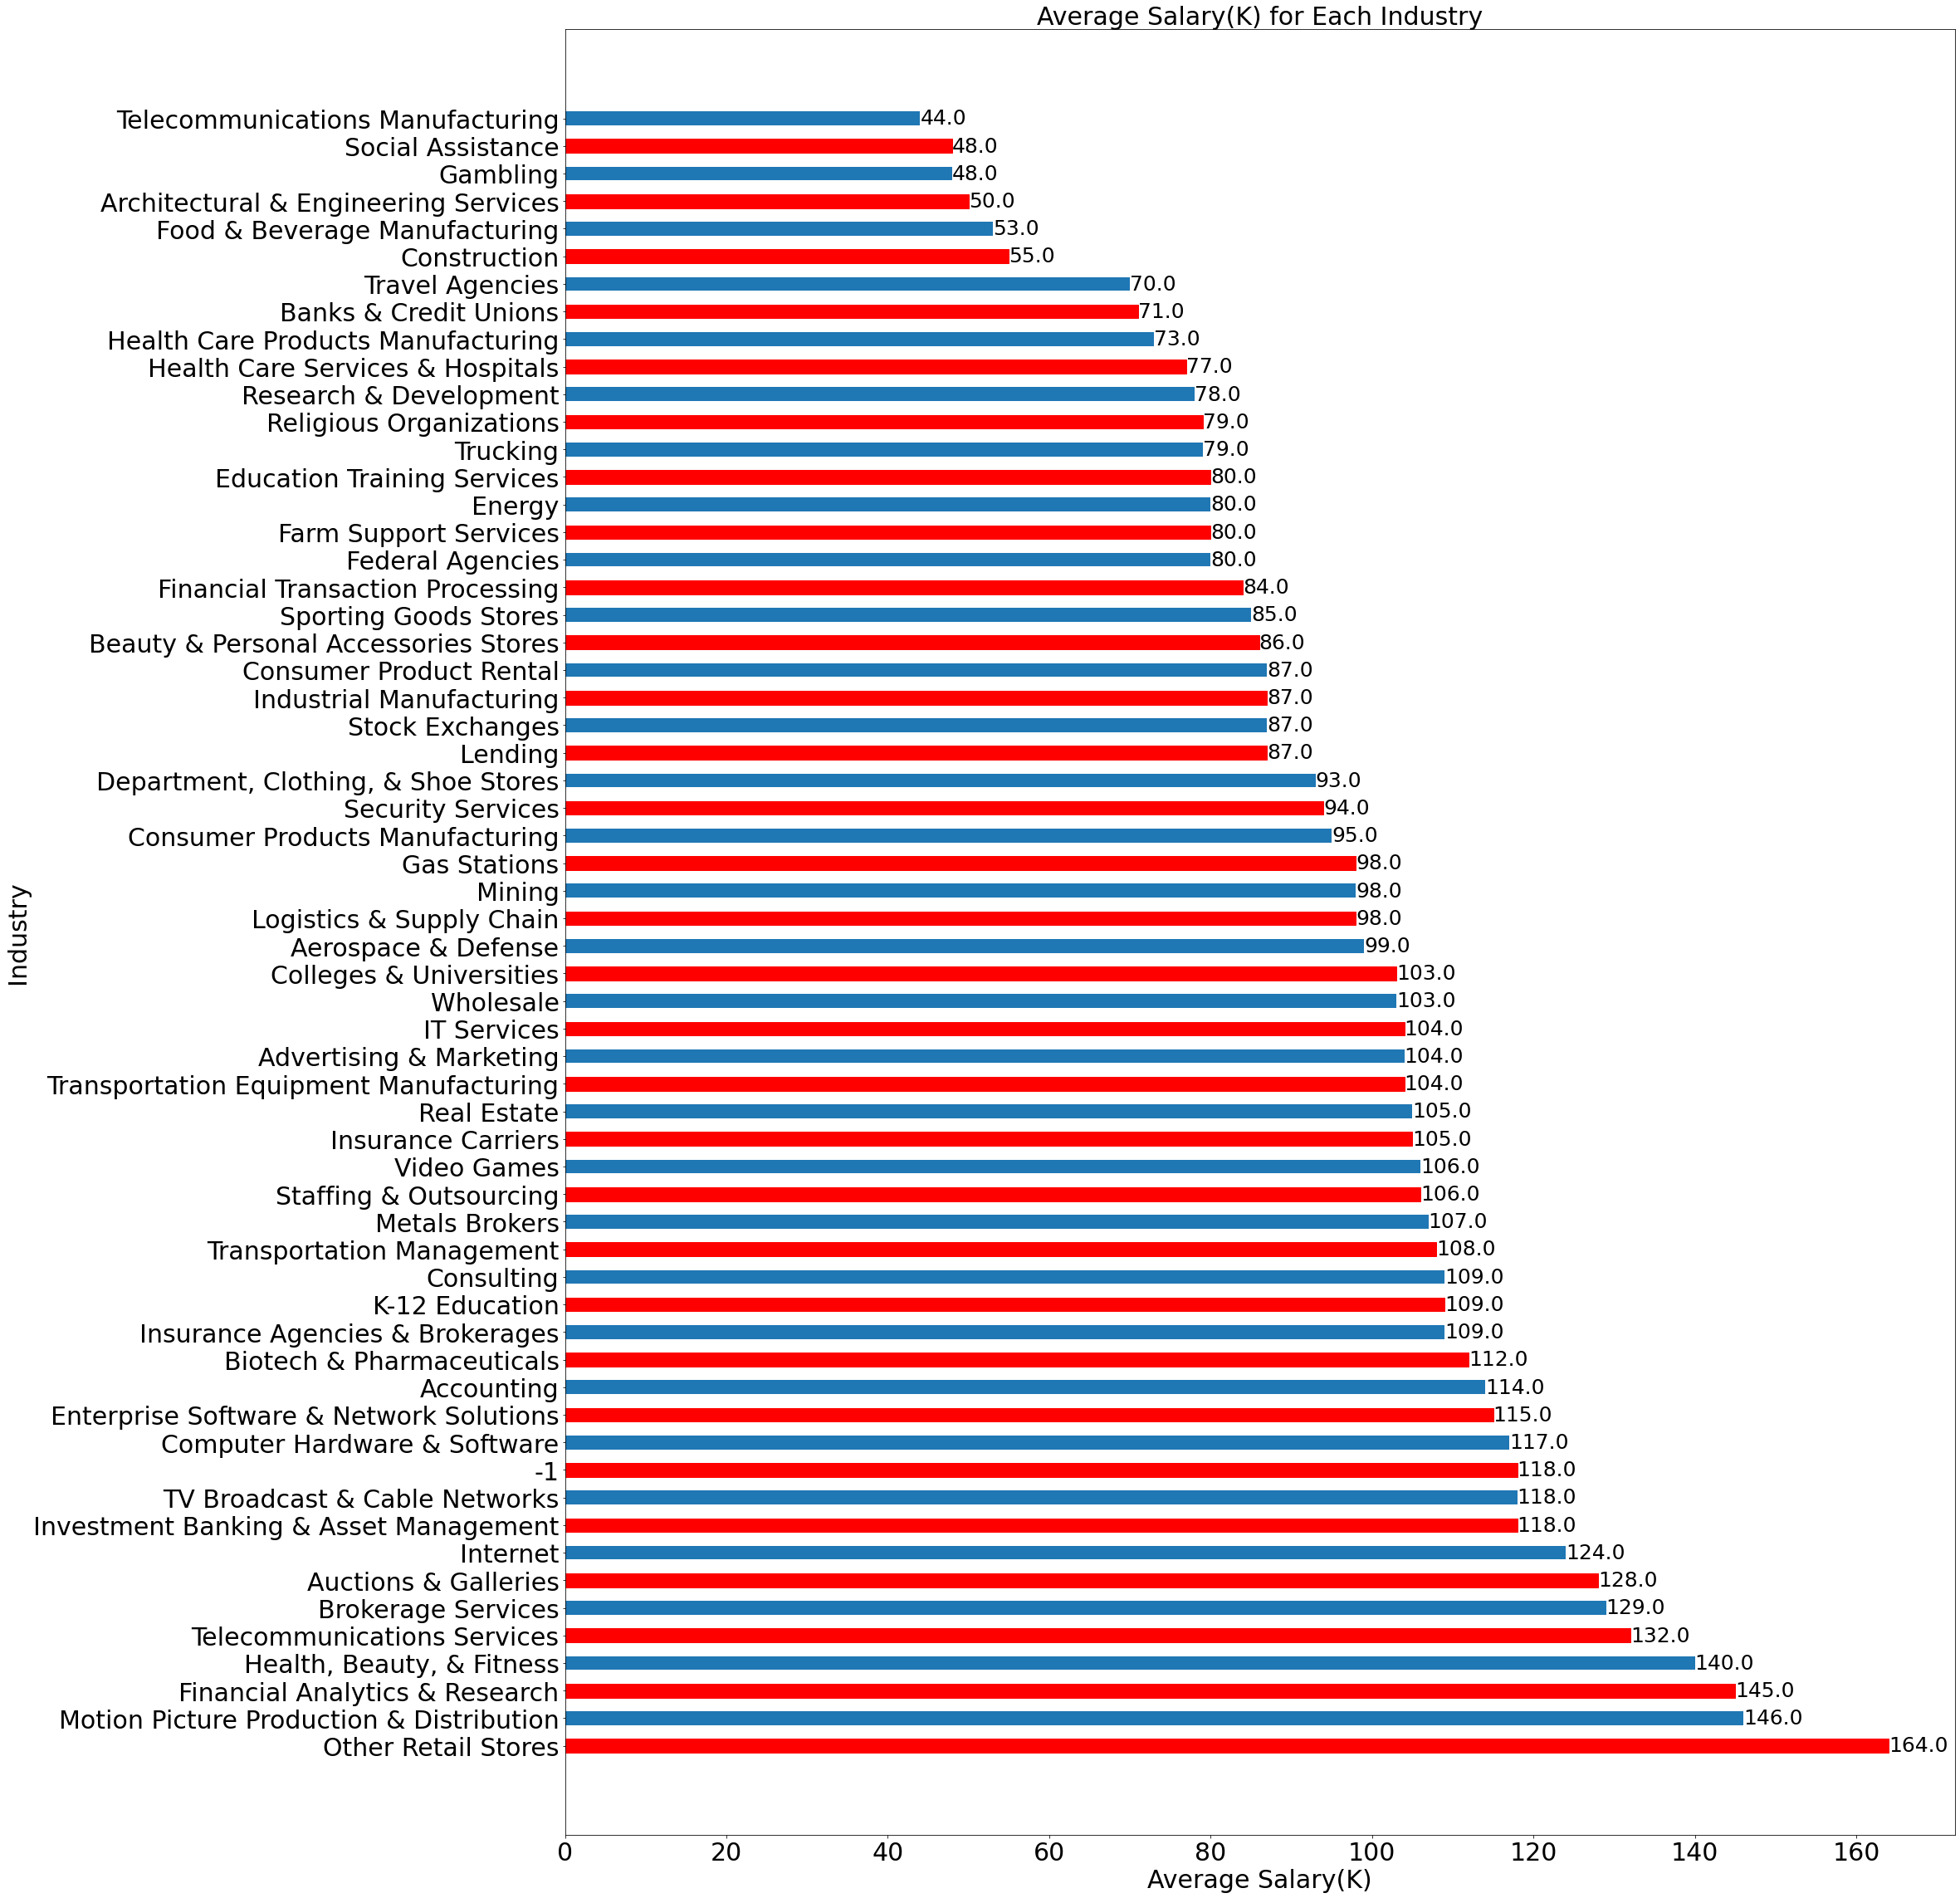

In [37]:
# draw the horizontal bar plot 
x = mean_salary_industry.index
y = mean_salary_industry['Avg Salary(K)'].round()

fig, ax = plt.subplots(figsize=(30, 40))
bars = ax.barh(x,y, 0.5)
for bar in bars:
  width = bar.get_width() 
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center', fontsize = 25)
  
for bar in bars[::2]:
  bar.set_color('r')

plt.title('Average Salary(K) for Each Industry', fontsize = 30)
plt.xlabel('Average Salary(K)', fontsize = 30)
plt.ylabel('Industry', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xticks(fontsize = 30)
plt.show()


## Hypothesis 4: The rating of the company is somehow related to company's age and size. 

In [148]:
# Find and clean the -1 in 'Founded' column
df = df.drop(df[df['Founded']==-1].index)
df['Founded'].value_counts()

2010    32
2008    31
1996    26
2006    24
2012    21
        ..
1860     1
1942     1
1878     1
1945     1
1889     1
Name: Founded, Length: 101, dtype: int64

### Company's Age Function

In [149]:
def cal_age(dataframe):
    """
    Function: cal_age
    Parameter: dataframe 
    Return: age of the company, a dataframe
    """
    dataframe['company_age'] = 2022 - dataframe['Founded'].values
    return dataframe


### Company's Size Function

In [150]:
def cal_size(dataframe):
    """
    Function: cal_size
    Parameter: dataframe 
    Return: average size of the company, a dataframe
    """
    # create a list and attach the value under the 'Size' column to the list
    size_list = []
    
    # check the size data and make a new array
    size = dataframe['Size'].values
    for i in size:  
        # remove any spaces 
        i = i.strip()  
        # take the average if the size is a range 
        if '-' in i:   
            # remove the strings 
            nums = i.split('-')
            num1 = int(nums[0].strip())
            num2 = int(nums[1].strip())
            size_list.append((num1+num2)//2)
        # keep the number if the size is an integer
        else:
            nums = i.split('+')
            size_list.append(int(nums[0]))
    dataframe['avg_company_size'] = size_list
    return   dataframe

In [151]:
# call the function and create new columns in original dataframe for company's age and size  
df = cal_age(df)
df = cal_size(df)

# show the edited dataframe 
df

,Job Title,Salary Estimate,Rating,Size,Founded,Industry,Revenue,Lower Salary,Upper Salary,Avg Salary(K),...,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,company_age,avg_company_size
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,501 - 1000,1973,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,...,1,1,0,0,0,data scientist,na,M,49,750
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,10000+,1984,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,...,0,0,0,0,0,data scientist,na,M,38,10000
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,501 - 1000,2010,Security Services,$100 to $500 million (USD),80,90,85.0,...,0,0,0,0,0,data scientist,na,M,12,750
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,1001 - 5000,1965,Energy,$500 million to $1 billion (USD),56,97,76.5,...,0,0,0,0,0,data scientist,na,na,57,3000
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,51 - 200,1998,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,...,0,0,0,0,0,data scientist,na,na,24,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,"Principal, Data Science - Advanced Analytics",$86K-$137K (Glassdoor est.),3.6,10000+,2017,Biotech & Pharmaceuticals,$2 to $5 billion (USD),86,137,111.5,...,0,0,0,0,0,data scientist,sr,M,5,10000
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),3.9,10000+,1830,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,...,0,0,0,0,0,other scientist,sr,M,192,10000
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),4.4,1001 - 5000,2006,Internet,$100 to $500 million (USD),72,133,102.5,...,0,0,0,0,0,data engineer,sr,na,16,3000
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),2.6,501 - 1000,1984,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,...,0,0,0,0,0,other scientist,na,P,38,750


### Scatter Plot between Average Company's Size and Rating

Text(0.5, 1.0, 'Rating based on Average Company Size')

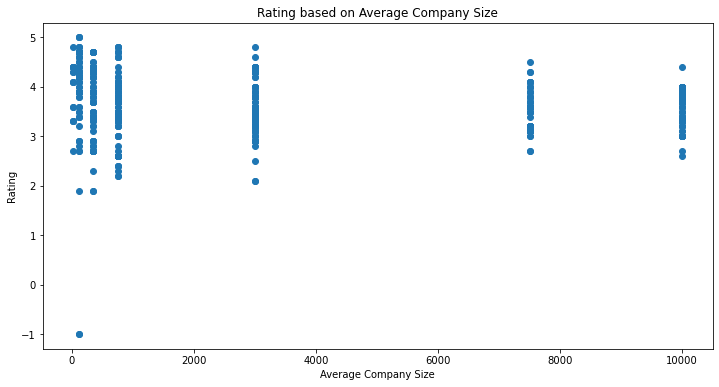

In [152]:
# draw scatter plot for company's size and rating
fig = plt.figure(figsize=[12,6])
plt.scatter(x=df['avg_company_size'],y = df['Rating'])
plt.ylabel('Rating')
plt.xlabel('Average Company Size')
plt.title('Rating based on Average Company Size')

### Scatter Plot between Average Company's Age and Rating

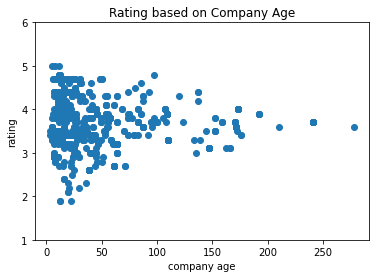

In [153]:
# draw scatter plot for company's age and rating;
plt.scatter(x=df['company_age'],y = df['Rating'])
plt.ylabel('rating')
plt.xlabel('company age')
plt.ylim(1,6)
plt.title('Rating based on Company Age')
plt.show()   

### Correlation Matrix

<AxesSubplot:>

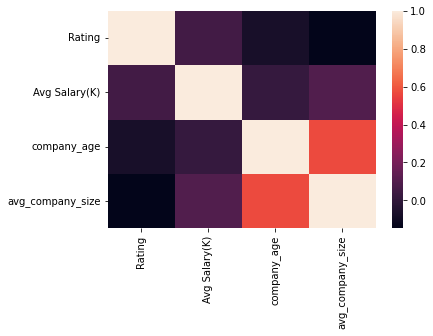

In [44]:
df_new = df[['Rating','Avg Salary(K)','company_age','avg_company_size']]
cm=df_new.corr()
sns.heatmap(cm)

In [79]:
# generate a new DataFrame called numeric_features that only contains numerical columns
numeric_features = df.select_dtypes(include=[np.number])
new_numeric_features = numeric_features.drop(columns = ['spark', 'hadoop', 'Python', 'scikit', 'sql', 'tensor',
                                                    'aws', 'keras', 'pytorch', 'flink', 'bi', 'mongo', 'sas',
                                                    'google_an', 'tableau', 'excel', 'Founded'])
corr = new_numeric_features.corr()
print(corr['Rating'].sort_values(ascending=False))

Rating              1.000000
Lower Salary        0.056957
Avg Salary(K)       0.050352
Upper Salary        0.044811
company_age        -0.074478
avg_company_size   -0.147228
Name: Rating, dtype: float64


# Step 3: Use linear regression to predict average salary

In [46]:
# dummify only the 'job_title_sim' and 'Job Location' columns
df_dummy = pd.get_dummies(df, columns = ['job_title_sim', 'Job Location', 'Industry'])

In [47]:
# add all column names into list for future use
my_list = list(df_dummy)
print(my_list)

['Job Title', 'Salary Estimate', 'Rating', 'Size', 'Founded', 'Revenue', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an', 'seniority_by_title', 'Degree', 'company_age', 'avg_company_size', 'job_title_sim_Data scientist project manager', 'job_title_sim_analyst', 'job_title_sim_data analitics', 'job_title_sim_data engineer', 'job_title_sim_data modeler', 'job_title_sim_data scientist', 'job_title_sim_director', 'job_title_sim_machine learning engineer', 'job_title_sim_other scientist', 'Job Location_AL', 'Job Location_AZ', 'Job Location_CA', 'Job Location_CO', 'Job Location_CT', 'Job Location_DC', 'Job Location_DE', 'Job Location_FL', 'Job Location_GA', 'Job Location_IA', 'Job Location_ID', 'Job Location_IL', 'Job Location_IN', 'Job Location_KS', 'Job Location_KY', 'Job Location_LA', 'Job Location_MA', 'Job Location_MD', 'Job Location_MI', 'Jo

In [62]:
# Define x and y variables 
y = df_dummy['Avg Salary(K)'].values
X = df_dummy[['job_title_sim_Data scientist project manager', 'job_title_sim_analyst','job_title_sim_data analitics', 'job_title_sim_data engineer', 'job_title_sim_data modeler', 
              'job_title_sim_data scientist', 'job_title_sim_director', 'job_title_sim_machine learning engineer', 'job_title_sim_other scientist','Job Location_AL', 'Job Location_AZ',
              'Job Location_CA', 'Job Location_CO', 'Job Location_CT','Job Location_DC', 'Job Location_DE', 'Job Location_FL','Job Location_GA', 'Job Location_IA', 'Job Location_ID',
              'Job Location_IL', 'Job Location_IN', 'Job Location_KS', 'Job Location_KY', 'Job Location_LA', 'Job Location_MA', 'mongo', 'google_an',
              'Job Location_MD', 'Job Location_MI', 'Job Location_MN', 'Job Location_MO', 'Job Location_NC', 'Job Location_NE', 'bi', 'flink',
              'Job Location_NJ', 'Job Location_NM', 'Job Location_NY', 'Job Location_OH', 'Job Location_OR', 'Job Location_PA', 'tensor', 'hadoop', 'tableau',      
              'Job Location_RI', 'Job Location_SC', 'Job Location_TN', 'Job Location_TX', 'Job Location_UT', 'Job Location_VA', 'keras', 'pytorch', 'scikit',
              'Job Location_WA', 'Job Location_WI', 'Rating','Python', 'spark', 'company_age',  'avg_company_size', 'aws','excel','sql','sas']].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 42, test_size = .33)

# examine the shapes of the resulting training set and test set 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# reshape the train and test size 
X_train = X_train.reshape(-1, 65)
X_test = X_test.reshape(-1, 65)

(457, 65) (226, 65) (457,) (226,)


In [64]:
# train and test predictive linear regression model for salary prediction based on title
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

,Actual,Predicted
0,92.0,113.768753
1,61.0,63.718578
2,142.0,147.873630
3,122.0,113.157467
4,124.5,114.690693
...,...,...
221,103.5,91.144609
222,122.5,102.184436
223,109.0,90.787108
224,121.0,164.540020


In [65]:
# compute the RMSE
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', model.score(X_test, y_test))

RMSE is: 
 0.3335096423381737


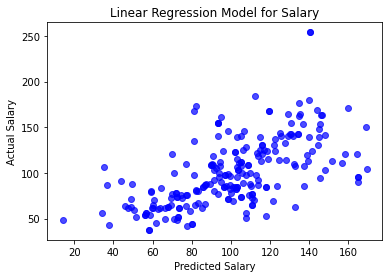

In [66]:
# draw the scatter graph
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.title('Linear Regression Model for Salary')
plt.show()

# Strengths and Shortcomings

Strengths: 
* We developed the linear regression model that generates good R-square and rmse to produce predictive results. 
* We included clear and understandable visualizations for every problem statement.  
* Besides testing the hypothesis, we also came up with a probability chart reflective of skills owned by each job to generate recommendations for job seekers.

Shortcomings:
* The number of x variables might not be optimized. 
* More diversified visualizations could be used. 
If given more time, we can apply “selectkbest” technique to decide the number of x variables for testing the regression model, which would generate the best R-square and rmse. What is more, we could explore more types of visualizations that can display the dataset in a better way. 


# Resources Used 

http://localhost:8891/notebooks/Week11_Regressions.ipynb

https://stackoverflow.com/questions/55906036/how-do-i-make-a-basic-regression-prediction

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html

https://stackoverflow.com/questions/20084487/use-index-in-pandas-to-plot-data

https://stackoverflow.com/questions/59276214/group-by-age-against-average-salary

https://stackoverflow.com/questions/36004976/count-frequency-of-values-in-pandas-dataframe-column

https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://stackoverflow.com/questions/71366538/how-to-fit-the-text-above-the-bars-plot-in-matplotlib

https://matplotlib.org/3.5.0/gallery/color/named_colors.html

https://blog.csdn.net/weixin_43981621/article/details/123217346?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164921418016780255220776%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=164921418016780255220776&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-4-123217346.142^v5^pc_search_insert_es_download,157^v4^control&utm_term=bar+text+label+&spm=1018.2226.3001.4187

http://localhost:8891/notebooks/Week11_Regressions.ipynb

https://365datascience.com/tutorials/python-tutorials/bar-chart-python-matplotlib/

http://localhost:8891/notebooks/Week11_Regressions.ipynb

https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

https://pandas.pydata.org/docs/reference/api/pandas.Index.html

https://www.geeksforgeeks.org/change-figure-size-in-pandas-python/

https://www.askpython.com/python/examples/python-predict-function

https://plotly.com/python/county-choropleth/

https://towardsdatascience.com/how-to-make-bar-and-hbar-charts-with-labels-using-matplotlib-b701ce70ba9c

https://stackoverflow.com/questions/52384429/how-to-display-the-name-of-a-us-state-when-using-plotlys-chloropleth-maps

Pandas module learned in MISM 3515 and MISM 2510
